In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 



In [1]:
pip install openpyxl

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# TABLE-1

#Import data
df_table_1 = pd.read_excel('/home/jovyan/UN_MigrantStockTotal_2015.xlsx', sheet_name = "Table 1")

#TABLE-1 STEP 1
# remove tittle information
df_table_1 = df_table_1.drop(range(0,15))
df_table_1
#TABLE-1 STEP 2

#create column names
df_table_1.set_axis(['sort/order', 'Major area / region / country', 'notes', 'country code', 'type of data', '1990 both sex','1995 both sex','2000 both sex','2005 both sex','2010 both sex','2015 both sex', '1990male','1995male','2000male','2005male','2010male','2015male', '1990female','1995female','2000female','2005female','2010female','2015female'], axis = 'columns', inplace = True)

df_table_1

# Problem Column names are values not variable names + multiple variables are stored in one column
# Tidy data principle #1 each column should hold a single variable

#TABLE-1 STEP 3
#Pivot demographic data and migrant numbers 
df_table_1 = df_table_1.melt(id_vars = ['sort/order', 'Major area / region / country', 'notes', 'country code', 'type of data'], var_name = ['demographic'], value_name = 'migrants')
df_table_1.head()

# TABLE-1 STEP 4
# Seperate Sex and year

df_table_1 = (df_table_1.assign(year = lambda x: x.demographic.str[0:4].astype(str), sex = lambda x: x.demographic.str[4:].astype(str)).drop("demographic", axis =1))
df_table_1.head(25)

#TABLE-1 STEP 5
#problem: there are multiple types of data stored in 1 table ie -- "major area", "region", and "country"
#tidy data principle #4: each table column needs to have a singular data type
#drop columns notes and country code

df_table_1 = df_table_1.drop(['notes','country code', 'type of data'],axis=1)
df_table_1 = df_table_1.drop(0)
df_table_1.head(25)

# TABLE-1 STEP 6
# pull Canada data from df
df_region = df_table_1.loc[df_table_1['Major area / region / country'].isin(['Canada'])]
df_region

# TABLE -1 STEP 7
# rename column to represent country
df_Canada_Migrants = df_region.rename(columns={'Major area / region / country':'country'})
df_Canada_Migrants

#TABLE-1 STEP 8
# Change column order so main observational unit is read last
df_Canada_Migrants = df_Canada_Migrants.iloc[:,[0,1,3,4,2]]
df_Canada_Migrants

# TABLE-1 STEP 9
# Reset Index 
df_Canada_Migrants.reset_index(drop= True)


,sort/order,country,year,sex,migrants
0,234,Canada,1990,both sex,4333318
1,234,Canada,1995,both sex,4864778
2,234,Canada,2000,both sex,5511914
3,234,Canada,2005,both sex,6078985
4,234,Canada,2010,both sex,7011226.0
5,234,Canada,2015,both sex,7835502.0
6,234,Canada,1990,male,2109652
7,234,Canada,1995,male,2356105
8,234,Canada,2000,male,2659135
9,234,Canada,2005,male,2915838


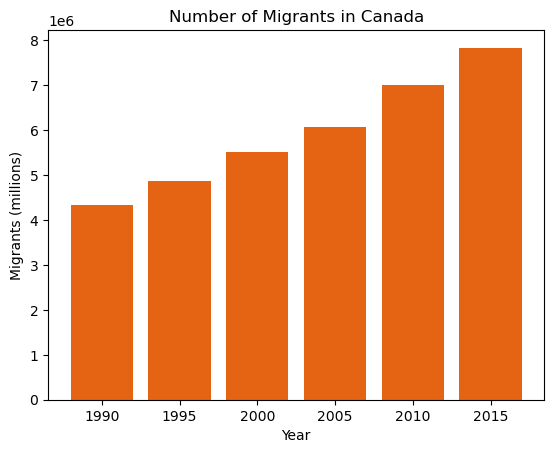

In [3]:
#Graph to display number of Migrants In Canada
year =  ['1990', '1995', '2000', '2005', '2010', '2015']
migrants = [4333318, 4864778, 5511914, 6078985, 7011226.0, 7835502.0]

plt.bar(year, migrants, color = '#E46414')
plt.title("Number of Migrants in Canada")
plt.xlabel('Year')
plt.ylabel('Migrants (millions)')
plt.show()

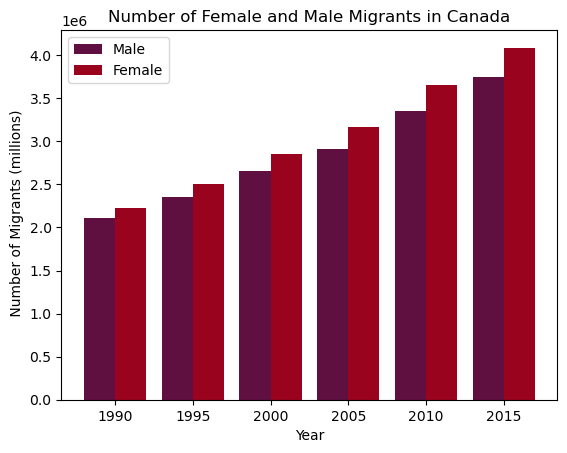

In [16]:
#graph to display female and male migrants in Canada

year =  ['1990', '1995', '2000', '2005', '2010', '2015']
male_migrants = [2109652, 2356105,2659135, 2915838, 3356211.0,3748267.0]
female_migrants = [2223666,2508673,2852779,3163147,3655015.0,4087235.0 ]

X_axis = np.arange(len(year))

plt.bar(X_axis - 0.2, male_migrants, 0.4, label = 'Male', color = '#5F0F40')
plt.bar(X_axis + 0.2, female_migrants, 0.4, label = 'Female', color = '#9A031E')

plt.xticks(X_axis, year)
plt.title("Number of Female and Male Migrants in Canada")
plt.xlabel('Year')
plt.ylabel(' Number of Migrants (millions)')
plt.legend()
plt.show()

In [5]:
#ANNUAL RATE OF CHANGE MIGRANT DATA
#Import Table 5 --  Annual rate of change of the migrant stock by sex and by major area, region, country or area, 1990-2015

df_table_5 = pd.read_excel('/home/jovyan/UN_MigrantStockTotal_2015.xlsx', sheet_name = "Table 5")
df_table_5.head(20)

# Table-5 STEP 1
# remove table 5 tittle information
df_table_5 = df_table_5.drop(range(0,15))
df_table_5

# TABLE-5 STEP 2
#create column names for table 3
df_table_5.set_axis(['sort/order', 'Major area / region / country', 'notes', 'country code', 'type of data', '1990-1995 both sex','1995-2000 both sex','2000-2005 both sex','2005-2010 both sex','2010-2015 both sex', '1990-1995 male','1995-2000 male','2000-2005 male','2005-2010 male','2010-2015 male','1990-1995 female','1995-2000 female','2000-2005 female','2005-2010 female','2010-2015 female'], axis = 'columns', inplace = True)
df_table_5

# TABLE-5 STEP 3
# Problem Column names are values not variable names + multiple variables are stored in one column
# Tidy data principle #1 each column should hold a single variable

#Pivot demographic data and migrant numbers 

df_table_5 = df_table_5.melt(id_vars = ['sort/order', 'Major area / region / country', 'notes', 'country code', 'type of data'], var_name = ['demographic'], value_name = 'rate of change')
df_table_5.head()

# TABLE-5 STEP 4
# Separate Sex and year

df_table_5 = (df_table_5.assign(year = lambda x: x.demographic.str[0:9].astype(str), sex = lambda x: x.demographic.str[9:].astype(str)).drop("demographic", axis =1))
df_table_5.head(25) 

# TABLE-5 STEP 5
#problem: there are multiple types of data stored in 1 table ie -- "major area", "region", and "country"
#tidy data principle #4: each table column needs to have a singular data type
#drop columns notes and country code

df_table_5 = df_table_5.drop(['notes','country code', 'type of data'],axis=1)
df_table_5

# TABLE-5 STEP 6
# Separate region and country

table_5_region = df_table_5.loc[df_table_5['Major area / region / country'].isin(['Canada'])]
table_5_region

# TABLE-5 STEP 7
# rename column to represent Major areas only
table_5_region = table_5_region.rename(columns={'Major area / region / country':'country'})
table_5_region

# TABLE-5 STEP 8
# Change column order so main observational unit is read last
table_5_region = table_5_region.iloc[:,[0,1,3,4,2]]
table_5_region

# TABLE-5 STEP 9
# Sort columns by region   

table_5_region= table_5_region.sort_values(['sex'])
table_5_region

# TABLE-5 STEP 10
# Reset index 
table_5_region.reset_index(drop= True)



,sort/order,country,year,sex,rate of change
0,234,Canada,1990-1995,both sex,2.313751
1,234,Canada,1995-2000,both sex,2.497817
2,234,Canada,2000-2005,both sex,1.958516
3,234,Canada,2005-2010,both sex,2.853497
4,234,Canada,2010-2015,both sex,2.223047
5,234,Canada,1990-1995,female,2.411935
6,234,Canada,1995-2000,female,2.570794
7,234,Canada,2000-2005,female,2.065476
8,234,Canada,2005-2010,female,2.890656
9,234,Canada,2010-2015,female,2.23537


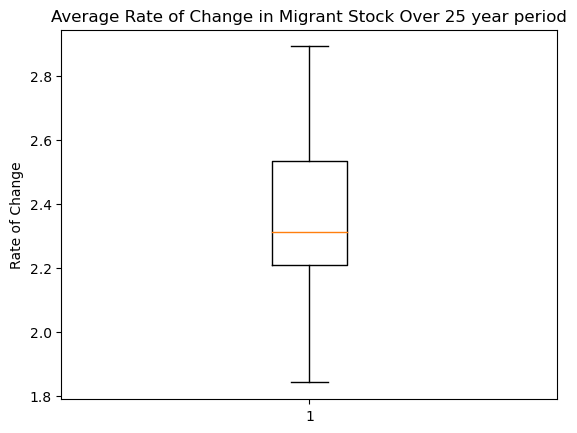

In [38]:
#Average rate of change for Migrant Data

plt.boxplot(table_5_region['rate of change'])
plt.title("Average Rate of Change in Migrant Stock Over 25 year period")
plt.ylabel('Rate of Change')

plt.show()

In [20]:
average = table_5_region["rate of change"].mean()
average

2.3677513690987397

In [23]:
# TABLE-2 Population data

#IMPORT TABLE-2 
df_table_2 = pd.read_excel('/home/jovyan/UN_MigrantStockTotal_2015.xlsx', sheet_name = "Table 2")
df_table_2.head(20)

# remove tittle information
df_table_2 = df_table_2.drop(range(0,15))
df_table_2

# TABLE -2 STEP 2
#create column names
df_table_2.set_axis(['sort/order', 'Major area, region, country or area of destination', 'notes', 'country code', '1990 both sex','1995 both sex','2000 both sex','2005 both sex','2010 both sex','2015 both sex', '1990male','1995male','2000male','2005male','2010male','2015male', '1990female','1995female','2000female','2005female','2010female','2015female'], axis = 'columns', inplace = True)

df_table_2

#TABLE - 2 STEP 3

# Problem Column names are values not variable names + multiple variables are stored in one column
# Tidy data principle #1 each column should hold a single variable

#Pivot demographic data and migrant numbers 
df_table_2 = df_table_2.melt(id_vars = ['sort/order', 'Major area, region, country or area of destination', 'notes', 'country code'], var_name = ['demographic'], value_name = 'population')
df_table_2.head()

#TABLE - 2 STEP 4
# Seperate Sex and year

df_table_2 = (df_table_2.assign(year = lambda x: x.demographic.str[0:4].astype(str), sex = lambda x: x.demographic.str[4:].astype(str)).drop("demographic", axis =1))
df_table_2.head(25)  

#TABLE - 2 STEP 5
#problem: there are multiple types of data stored in 1 table ie -- "major area", "region", and "country"
#tidy data principle #4: each table column needs to have a singular data type


# pull Canada data from df
df_region = df_table_2.loc[df_table_2['Major area, region, country or area of destination'].isin(['Canada'])]
df_region

#TABLE - 2 STEP 6
#drop columns notes and country code
df_region = df_region.drop(['notes','country code'],axis=1)
df_region

# TABLE -1 STEP 7
# rename column to represent country
df_Canada = df_region.rename(columns={'Major area, region, country or area of destination':'country'})
df_Canada

#TABLE-1 STEP 8
# Change column order so main observational unit is read last
df_Canada = df_Canada.iloc[:,[0,1,3,4,2]]
df_Canada

# TABLE-1 STEP 9
# Reset Index 
df_Canada.reset_index(drop= True)

,sort/order,country,year,sex,population
0,234,Canada,1990,both sex,27662.44
1,234,Canada,1995,both sex,29299.478
2,234,Canada,2000,both sex,30701.903
3,234,Canada,2005,both sex,32256.333
4,234,Canada,2010,both sex,34126.173
5,234,Canada,2015,both sex,35939.927
6,234,Canada,1990,male,13715.671
7,234,Canada,1995,male,14502.843
8,234,Canada,2000,male,15204.35
9,234,Canada,2005,male,15986.28


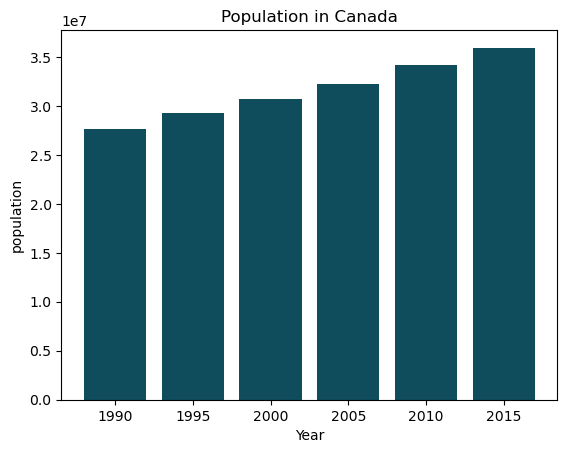

In [11]:
# Graph total population in Canada 

year =  ['1990', '1995', '2000', '2005', '2010', '2015']
population = [27662440, 29299478, 30701903, 32256333, 34126173, 35939927]

plt.bar(year, population, color = '#0F4C5C')
plt.title("Population in Canada")
plt.xlabel('Year')
plt.ylabel('population')
plt.show()

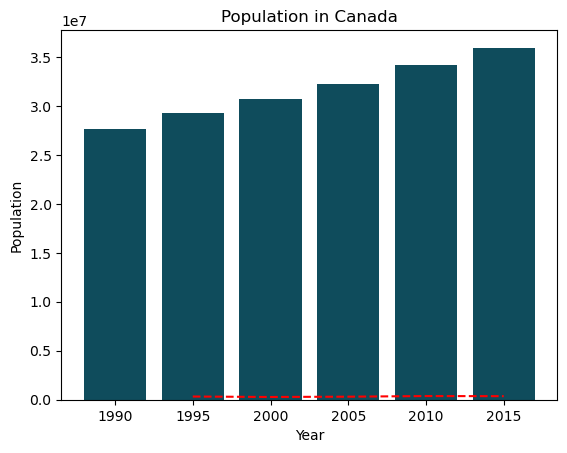

331099.48000000004


In [11]:

year = ['1990', '1995', '2000', '2005', '2010', '2015']
population = [27662440, 29299478, 30701903, 32256333, 34126173, 35939927]

# Calculate the rate of change using the numpy diff() method
# and divide by the time interval (5 years)
rate_of_change = np.diff(population) / 5

# Plot the population data as a bar chart
plt.bar(year, population, color = '#0F4C5C')

# Plot the rate of change data as a line chart
plt.plot(year[1:], rate_of_change, color = 'red', linestyle = '--', zorder = 500000)

plt.title("Population in Canada")
plt.xlabel('Year')
plt.ylabel('Population')


plt.show()

# Calculate the rate of change using the numpy diff() method
# and divide by the time interval (5 years)
rate_of_change = np.diff(population) / 5

# Calculate the average rate of change
average_rate_of_change = np.mean(rate_of_change)

# Print the average rate of change
print(average_rate_of_change)


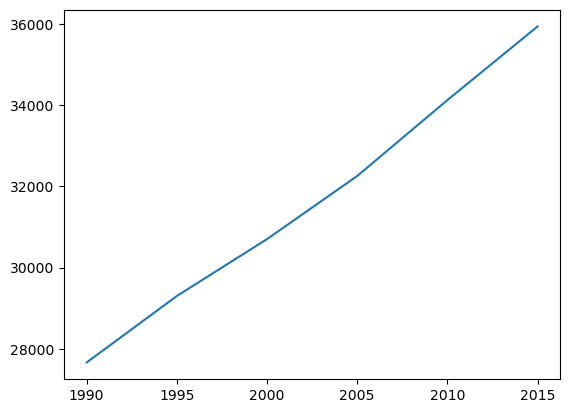

In [35]:

#total_pop = df_Canada.loc[df_Canada['sex']=='both sex']

total_pop = df_Canada.loc[233:1558]
total_pop

x= total_pop.year
y = total_pop.population

plt.plot(x,y)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffa285c24f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffa285c2a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffa285c2220>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffa285c2f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffa285c9220>],
 'means': []}

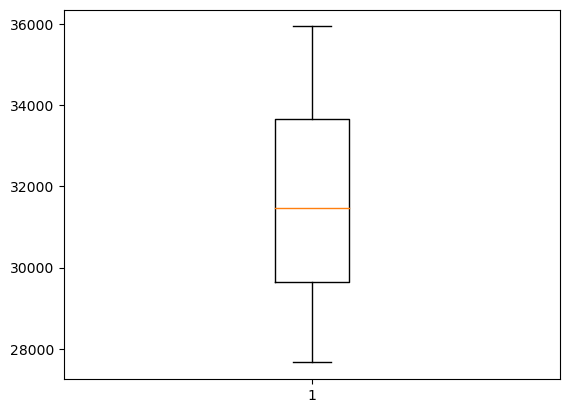

In [36]:
#Average population in canada

plt.boxplot(total_pop['population'])

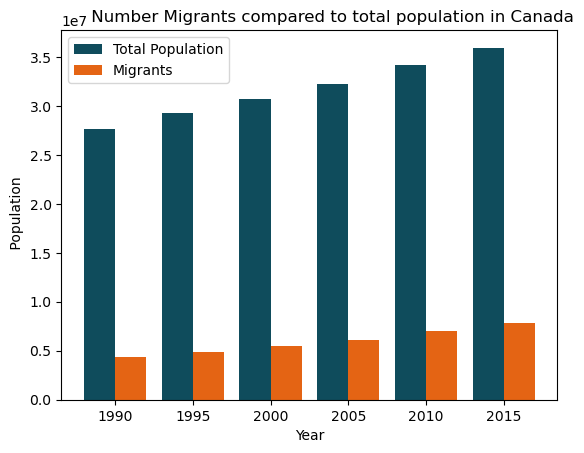

In [19]:
#Graph to display migrants compared to total population in Canada

year =  ['1990', '1995', '2000', '2005', '2010', '2015']
total_population = [27662440, 29299478, 30701903, 32256333, 34126173, 35939927]
Migrants = [4333318, 4864778, 5511914, 6078985, 7011226.0, 7835502.0]

X_axis = np.arange(len(year))

percentages = ['16%','17%', '18%', '19%', '20.5%', '22%']

plt.bar(X_axis - 0.2, total_population, 0.4, label = 'Total Population', color = '#0F4C5C')
plt.bar(X_axis + 0.2, Migrants, 0.4, label = 'Migrants', color = '#E46414')

plt.xticks(X_axis, year)
plt.title("         Number Migrants compared to total population in Canada")
plt.xlabel('Year')
plt.ylabel(' Population')
plt.legend()
plt.show()

In [41]:
#Import Table 3 MIGRANT DATA AS PERCENTAGE OF TOTAL POPULATION

df_table_3 = pd.read_excel('/home/jovyan/UN_MigrantStockTotal_2015.xlsx', sheet_name = "Table 3")
df_table_3.head(20)

# TABLE -3 STEP 1
# remove table 3 tittle information
df_table_3 = df_table_3.drop(range(0,15))
df_table_3

# TABLE -3 STEP 2
#create column names for table 3
df_table_3.set_axis(['sort/order', 'Major area / region / country', 'notes', 'country code', 'type of data', '1990 both sex','1995 both sex','2000 both sex','2005 both sex','2010 both sex','2015 both sex', '1990male','1995male','2000male','2005male','2010male','2015male', '1990female','1995female','2000female','2005female','2010female','2015female'], axis = 'columns', inplace = True)

df_table_3

# TABLE -3 STEP 3
# Problem Column names are values not variable names + multiple variables are stored in one column
# Tidy data principle #1 each column should hold a single variable

#Pivot demographic data and migrant numbers 
df_table_3 = df_table_3.melt(id_vars = ['sort/order', 'Major area / region / country', 'notes', 'country code', 'type of data'], var_name = ['demographic'], value_name = 'Percentage')
df_table_3.head()

# TABLE -3 STEP 4
# Seperate Sex and year

df_table_3 = (df_table_3.assign(year = lambda x: x.demographic.str[0:4].astype(str), sex = lambda x: x.demographic.str[4:].astype(str)).drop("demographic", axis =1))
df_table_3.head(25) 

# TABLE -3 STEP 5
#problem: there are multiple types of data stored in 1 table ie -- "major area", "region", and "country"
#tidy data principle #4: each table column needs to have a singular data type

#drop columns notes and country code
df_table_3 = df_table_3.drop(['notes','country code', 'type of data'],axis=1)
df_table_3

# TABLE -3 STEP 6
# Seperate region and country
table_3_region = df_table_3.loc[df_table_3['Major area / region / country'].isin(['Canada'])]
table_3_region

# TABLE -3 STEP 7
# rename column to represent Major areas only
table_3_region = table_3_region.rename(columns={'Major area / region / country':'country'})
table_3_region

# TABLE -3 STEP 8
# Change column order so main observational unit is read last
table_3_region = table_3_region.iloc[:,[0,1,3,4,2]]
table_3_region

# TABLE -3 STEP 9
# Sort columns by region   
table_3_region= table_3_region.sort_values(['sex'])
table_3_region

# TABLE-5 STEP 10
# Reset index 
table_3_region.reset_index(drop= True)




,sort/order,country,year,sex,Percentage
0,234,Canada,1990,both sex,15.664988
1,234,Canada,1995,both sex,16.603634
2,234,Canada,2000,both sex,17.953004
3,234,Canada,2005,both sex,18.845865
4,234,Canada,2010,both sex,20.545011
5,234,Canada,2015,both sex,21.801664
6,234,Canada,2005,female,19.441529
7,234,Canada,2000,female,18.407932
8,234,Canada,1995,female,16.954348
9,234,Canada,1990,female,15.943951


{'whiskers': [<matplotlib.lines.Line2D at 0x7ffa2bb4bb20>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffa2e611730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffa2bb919d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffa2e611af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffa2e611430>],
 'means': []}

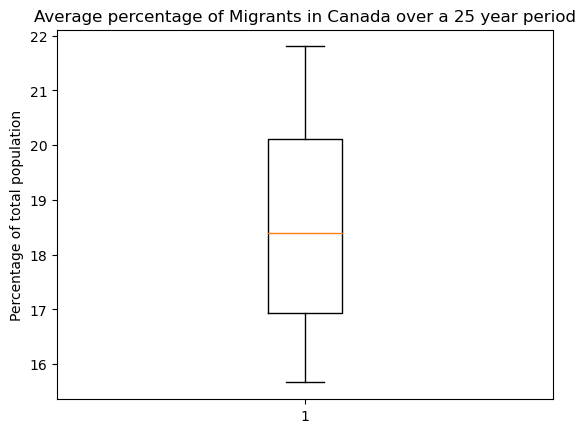

In [44]:
#Plot Average Percent of Migrants in Canada

total= table_3_region.loc[233:1558]
plt.title("Average percentage of Migrants in Canada over a 25 year period")
plt.ylabel('Percentage of total population')

total
plt.boxplot(total['Percentage'])

In [8]:
# REFUGEE DATA 

#Import Table 6 -- Estimated refugee stock at mid-year by major area, region, country or area, 1990-2015
df_table_6 = pd.read_excel('/home/jovyan/UN_MigrantStockTotal_2015.xlsx', sheet_name = "Table 6")
df_table_6.head(20)

# TABLE - 6 STEP 1
# remove table 3 tittle information
df_table_6 = df_table_6.drop(range(0,15))
df_table_6

# TABLE -6 Step 2
#create column names for table 6

df_table_6.set_axis(['sort/order', 'Major area / region / country', 'notes', 'country code', 'type of data', '1990 both sex','1995 both sex','2000 both sex','2005 both sex','2010 both sex','2015 both sex', '1990','1995','2000','2005','2010','2015', '1990-1995','1995-2000','2000-2005','2005-2010','2010-2015'], axis = 'columns', inplace = True)
df_table_6

# TABLE -6 Step 3

#Problem: Multiple types of observational units are stored in the same table
# Address problem by spliting the table into three new tables. One for Estimated refugee stock (A), 
#one for refugees as percentage of migrant stock (B), and one for rate of change in refugee stock (C)

#first print and clean table 6A - Estimated refugee stock
table_6_A = df_table_6.drop(labels=['1990','1995','2000','2005','2010','2015', '1990-1995','1995-2000','2000-2005','2005-2010','2010-2015'],axis=1)
table_6_A


#Pivot demographic data and migrant numbers 

table_6_A = table_6_A.melt(id_vars = ['sort/order', 'Major area / region / country', 'notes', 'country code', 'type of data'], var_name = ['demographic'], value_name = 'Refugee stock')
table_6_A.head()

# Separate Sex and year

table_6_A = (table_6_A.assign(year = lambda x: x.demographic.str[0:4].astype(str), sex = lambda x: x.demographic.str[4:].astype(str)).drop("demographic", axis =1))
table_6_A.head()

#problem: there are multiple types of data stored in 1 table ie -- "major area", "region", and "country"
#tidy data principle #4: each table column needs to have a singular data type
#drop columns notes and country code
table_6_A = table_6_A.drop(['notes','country code', 'type of data'],axis=1)
table_6_A

#Separate region and country

table_6_A = table_6_A.loc[table_6_A['Major area / region / country'].isin(['Canada'])]
table_6_A

# Change column order so main observational unit is read last
table_6_A = table_6_A.iloc[:,[0,1,3,4,2]]
table_6_A

table_6_A= table_6_A.sort_values(['sort/order','Major area / region / country'])
table_6_A


,sort/order,Major area / region / country,year,sex,Refugee stock
233,234,Canada,1990,both sex,145257
498,234,Canada,1995,both sex,152125
763,234,Canada,2000,both sex,125154
1028,234,Canada,2005,both sex,147171
1293,234,Canada,2010,both sex,165549.0
1558,234,Canada,2015,both sex,160279.0


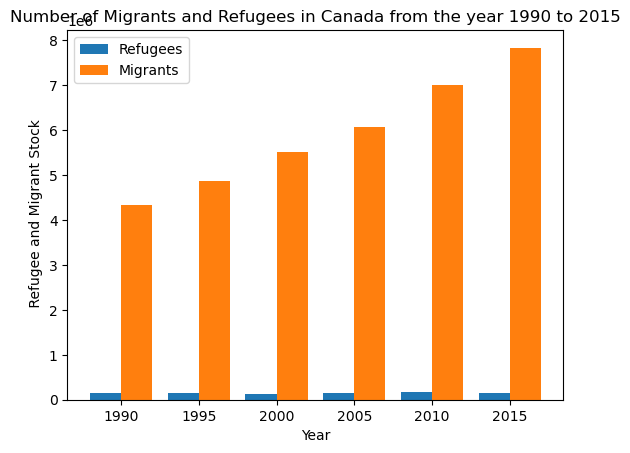

In [9]:
#Graph to display refugees and migrants in Canada

year =  ['1990', '1995', '2000', '2005', '2010', '2015']
Refugees = [145257, 152125, 125154,147171, 165549.0, 160279.0]
Migrants = [4333318, 4864778, 5511914, 6078985, 7011226.0, 7835502.0]

X_axis = np.arange(len(year))

plt.bar(X_axis - 0.2, Refugees, 0.4, label = 'Refugees')
plt.bar(X_axis + 0.2, Migrants, 0.4, label = 'Migrants')

plt.xticks(X_axis, year)
plt.title("Number of Migrants and Refugees in Canada from the year 1990 to 2015")
plt.xlabel('Year')
plt.ylabel(' Refugee and Migrant Stock')
plt.legend()
plt.show()

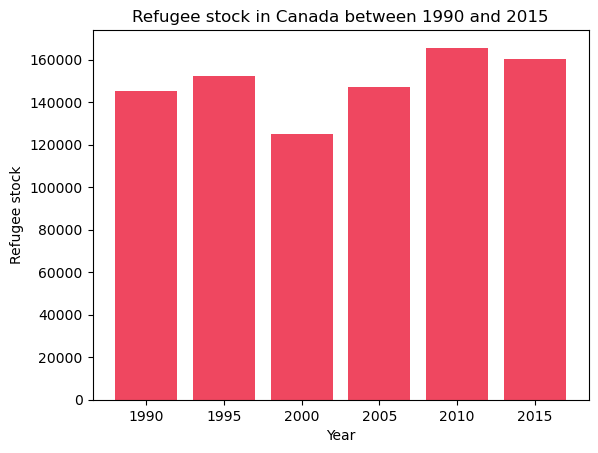

In [25]:
#Graph to display refugees 


year =  ['1990', '1995', '2000', '2005', '2010', '2015']
refugees = [145257, 152125, 125154,147171, 165549.0, 160279.0]

plt.bar(year, refugees, color ='#EF4760')
plt.title("Refugee stock in Canada between 1990 and 2015")
plt.xlabel('Year')
plt.ylabel('Refugee stock')
plt.show()

In [2]:
pip install circlify

  Using cached circlify-0.15.0-py2.py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


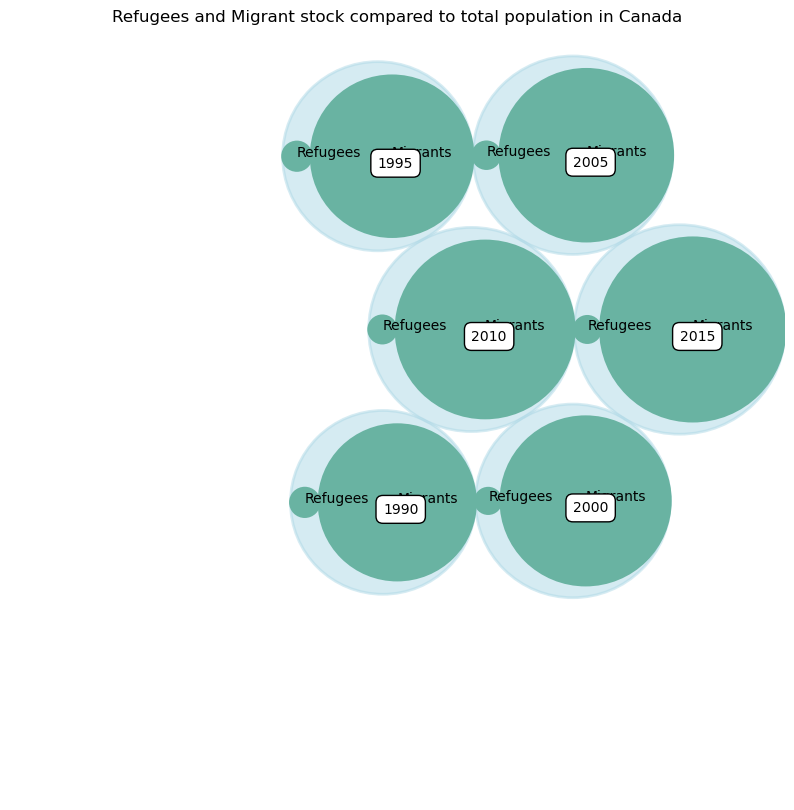

In [71]:
# import libraries
import circlify
import matplotlib.pyplot as plt


data = [{'id': 'Canada', 'datum': 50000000, 'children' : [
              {'id' : "1990", 'datum': 27662440,
                   'children' : [
                     {'id' : "Migrants", 'datum' : 4333318},
                     {'id' : "Refugees", 'datum' : 145257} 
                   ]},
              {'id' : "1995", 'datum' : 29299478, 
                   'children' : [
                     {'id' : "Migrants", 'datum' : 4864778},
                     {'id' : "Refugees", 'datum' : 152125}
                     ]},
              {'id' : "2000", 'datum' : 30701903,  
                   'children' : [
                     {'id' : "Migrants", 'datum' : 5511914},
                     {'id' : "Refugees", 'datum' : 125154}
                   ]},
              {'id' : "2005", 'datum' : 32256333,  
                   'children' : [
                     {'id' : "Migrants", 'datum' : 6078985},
                     {'id' : "Refugees", 'datum' : 147171}
                   ]},
              {'id' : "2010", 'datum' : 34126173,  
                   'children' : [
                     {'id' : "Migrants", 'datum' : 7011226.0},
                     {'id' : "Refugees", 'datum' : 165549.0}
                   ]},
              {'id' : "2015", 'datum' : 35939927,  
                   'children' : [
                     {'id' : "Migrants", 'datum' : 7835502.0},
                     {'id' : "Refugees", 'datum' : 160279.0}
                   ]}
    ]}]






# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Refugees and Migrant stock compared to total population in Canada')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (population):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=1, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), color="black")
    
# Print labels for the population year
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y) ,va= 'top', ha= 'left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

